<a href="https://colab.research.google.com/github/AhmadKhan010/-Brain_Tumor_Segmentation_with_YOLO11_and_SAM2/blob/main/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install segment-anything

In [2]:
!pip install ultralytics


  Using cached ultralytics-8.3.114-py3-none-any.whl.metadata (37 kB)
  Using cached ultralytics_thop-2.0.14-py3-none-any.whl.metadata (9.4 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.5.147-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.3.1.170-py3-none-manylinux2014_x86_64.whl.

In [4]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo11n.pt")

# Train the model
train_results = model.train(
    data="/content/sample_data/TumorData/data.yaml",  # path to dataset YAML
    epochs=20,  # number of training epochs
    imgsz=640,  # training image size
    device=0,  # device to run on, i.e. device=0 or device=0,1,2,3 or device=cpu
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.35M/5.35M [00:00<00:00, 302MB/s]


Ultralytics 8.3.114 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/sample_data/TumorData/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, 

100%|██████████| 755k/755k [00:00<00:00, 107MB/s]

Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

YOLO11n summary: 181 layers, 2,590,815 parameters, 2,590,799 gradients, 6.4 GFLOPs

Transferred 448/499 items from pretrained weights
Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 935.4±285.9 MB/s, size: 34.0 KB)


train: Scanning /content/sample_data/TumorData/train/labels... 1370 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1370/1370 [00:00<00:00, 2188.80it/s]

train: /content/sample_data/TumorData/train/images/no_tumor_914_jpg.rf.6714544aee2bde5213fd2c366dff62aa.jpg: 1 duplicate labels removed
train: New cache created: /content/sample_data/TumorData/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 1456, len(boxes) = 1461. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 646.1±420.0 MB/s, size: 29.4 KB)


val: Scanning /content/sample_data/TumorData/valid/labels... 395 images, 0 backgrounds, 0 corrupt: 100%|██████████| 395/395 [00:00<00:00, 995.12it/s] 

val: New cache created: /content/sample_data/TumorData/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.27G     0.9223      3.055      1.288         19        640: 100%|██████████| 86/86 [00:26<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.73it/s]

                   all        395        415      0.882      0.255      0.381      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.67G     0.9173      1.983      1.259         19        640: 100%|██████████| 86/86 [00:23<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.91it/s]


                   all        395        415      0.835      0.362      0.433      0.325

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.67G     0.9429      1.708      1.275         16        640: 100%|██████████| 86/86 [00:23<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.15it/s]

                   all        395        415      0.876      0.327      0.433        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.68G     0.9383      1.502      1.266         18        640: 100%|██████████| 86/86 [00:23<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.23it/s]


                   all        395        415      0.691      0.505      0.495       0.35

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.68G     0.9161      1.393      1.245         34        640: 100%|██████████| 86/86 [00:23<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.80it/s]

                   all        395        415      0.804       0.46      0.507       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.69G     0.9017      1.225      1.249         22        640: 100%|██████████| 86/86 [00:23<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.92it/s]

                   all        395        415      0.819      0.526      0.575      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.69G     0.8237      1.091       1.19         23        640: 100%|██████████| 86/86 [00:23<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.37it/s]

                   all        395        415      0.784      0.515      0.563      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.71G     0.8188      1.046      1.203         21        640: 100%|██████████| 86/86 [00:23<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.03it/s]

                   all        395        415      0.797      0.539      0.587      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.71G     0.8048     0.9732      1.183         21        640: 100%|██████████| 86/86 [00:24<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.48it/s]

                   all        395        415      0.821      0.609      0.619      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.71G     0.7932      0.934      1.182         21        640: 100%|██████████| 86/86 [00:23<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.08it/s]

                   all        395        415      0.819      0.589      0.624       0.49


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.71G     0.6972     0.9464      1.133         10        640: 100%|██████████| 86/86 [00:23<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.35it/s]

                   all        395        415       0.82      0.565      0.601      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.71G     0.6978     0.8552      1.134         11        640: 100%|██████████| 86/86 [00:21<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.28it/s]

                   all        395        415      0.853      0.613      0.648      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.71G     0.6497     0.8014      1.105         10        640: 100%|██████████| 86/86 [00:21<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.32it/s]

                   all        395        415      0.821       0.61      0.624      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.71G     0.6382     0.7508      1.096         11        640: 100%|██████████| 86/86 [00:21<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.30it/s]

                   all        395        415      0.827      0.626      0.652      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.71G     0.6002     0.7018      1.063         11        640: 100%|██████████| 86/86 [00:21<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.18it/s]

                   all        395        415      0.795       0.62      0.634      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.71G     0.5992      0.677      1.072         10        640: 100%|██████████| 86/86 [00:22<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.22it/s]

                   all        395        415      0.841      0.594      0.642      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.71G     0.5733     0.6384      1.053         12        640: 100%|██████████| 86/86 [00:21<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.25it/s]

                   all        395        415       0.89      0.603      0.656      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.71G     0.5578     0.6001      1.046         11        640: 100%|██████████| 86/86 [00:21<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.25it/s]

                   all        395        415      0.851      0.624      0.663      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.71G     0.5319     0.5683      1.032         10        640: 100%|██████████| 86/86 [00:21<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.25it/s]

                   all        395        415      0.861      0.635       0.67       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.71G     0.5216     0.5426      1.024         10        640: 100%|██████████| 86/86 [00:21<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.31it/s]

                   all        395        415      0.877      0.607      0.666      0.543



20 epochs completed in 0.151 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.114 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,583,127 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.50it/s]


                   all        395        415      0.877      0.606      0.666      0.543
              NO_tumor        115        116      0.925      0.974      0.974      0.799
                glioma         30         36      0.753      0.425      0.619      0.451
            meningioma        144        148      0.951      0.892      0.954      0.833
             pituitary        106        111      0.757      0.739      0.782      0.632
space-occupying lesion-          1          4          1          0    0.00299    0.00269
Speed: 0.6ms preprocess, 2.5ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to runs/detect/train



image 1/1 /content/test_images/meningioma_266_jpg.rf.69827cc77ab46c07c7d00774b55523c2.jpg: 640x640 1 meningioma, 12.3ms
Speed: 2.4ms preprocess, 12.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


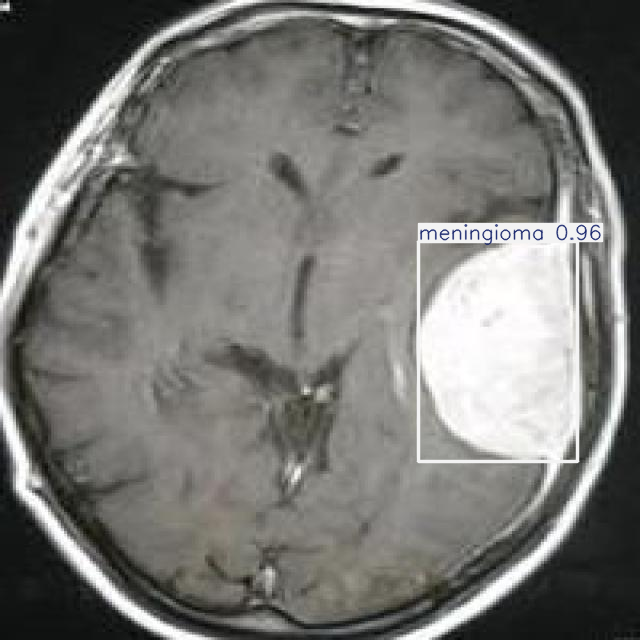

In [6]:
from ultralytics import YOLO

# Load a model
model = YOLO("/content/runs/detect/train/weights/best.pt")

# Perform object detection on an image
results = model("/content/test_images/meningioma_266_jpg.rf.69827cc77ab46c07c7d00774b55523c2.jpg", save=True)
results[0].show()

In [7]:
# Load a model
model = YOLO("runs/detect/train/weights/best.pt")

# Perform object detection on an image
results = model("/content/test_images", save=True)


image 1/4 /content/test_images/glioma_20_jpg.rf.8fdf825f9ca269bc07429aee7781e8d9.jpg: 640x640 1 glioma, 12.5ms
image 2/4 /content/test_images/meningioma_266_jpg.rf.69827cc77ab46c07c7d00774b55523c2.jpg: 640x640 1 meningioma, 13.8ms
image 3/4 /content/test_images/no_tumor_1563_jpg.rf.5544261b8c8130bd54574f994fcad2d6.jpg: 640x640 1 NO_tumor, 17.7ms
image 4/4 /content/test_images/no_tumor_168_jpg.rf.587bc894e659b547ff6fed7350269023.jpg: 640x640 1 NO_tumor, 9.0ms
Speed: 2.5ms preprocess, 13.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2


In [8]:
from ultralytics import YOLO

# Load a model
model = YOLO("/content/runs/detect/train/weights/best.pt")  # pretrained YOLO11n model

# Run batched inference on a list of images
results = model("/content/test_images/glioma_20_jpg.rf.8fdf825f9ca269bc07429aee7781e8d9.jpg")  # return a list of Results objects

# Process results list
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    print(boxes)


image 1/1 /content/test_images/glioma_20_jpg.rf.8fdf825f9ca269bc07429aee7781e8d9.jpg: 640x640 1 glioma, 11.8ms
Speed: 2.1ms preprocess, 11.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([1.], device='cuda:0')
conf: tensor([0.5092], device='cuda:0')
data: tensor([[227.4540, 237.0940, 272.8073, 272.3310,   0.5092,   1.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (640, 640)
shape: torch.Size([1, 6])
xywh: tensor([[250.1306, 254.7125,  45.3533,  35.2370]], device='cuda:0')
xywhn: tensor([[0.3908, 0.3980, 0.0709, 0.0551]], device='cuda:0')
xyxy: tensor([[227.4540, 237.0940, 272.8073, 272.3310]], device='cuda:0')
xyxyn: tensor([[0.3554, 0.3705, 0.4263, 0.4255]], device='cuda:0')


In [9]:
from ultralytics import YOLO
from ultralytics import SAM

# Load the YOLO model
yolo_model = YOLO("/content/runs/detect/train/weights/best.pt")  # pretrained YOLO model

# Run batched inference on a list of images
results = yolo_model("/content/test_images/meningioma_266_jpg.rf.69827cc77ab46c07c7d00774b55523c2.jpg")  # return a list of Results objects

# Load the SAM model
sam_model = SAM("sam2_b.pt")

for result in results:
     class_ids = result.boxes.cls.int().tolist()  # noqa
     if len(class_ids):
         boxes = result.boxes.xyxy  # Boxes object for bbox outputs
         sam_results = sam_model(result.orig_img, bboxes=boxes, verbose=False, save=True, device=0)


image 1/1 /content/test_images/meningioma_266_jpg.rf.69827cc77ab46c07c7d00774b55523c2.jpg: 640x640 1 meningioma, 11.9ms
Speed: 2.1ms preprocess, 11.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


100%|██████████| 154M/154M [00:17<00:00, 9.28MB/s]


Results saved to runs/segment/predict
